In [1]:
# load required libraries or packages for this example
library(mlpack)
library(data.table)
library(wordcloud)
library(tm)
library(dplyr)
library(ggplot2)


Attaching package: ‘mlpack’


The following object is masked from ‘package:stats’:

    kmeans


The following object is masked from ‘package:base’:

    det


Loading required package: RColorBrewer

Loading required package: NLP


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘ggplot2’


The following object is masked from ‘package:NLP’:

    annotate




In [2]:
# read movie and ratings data into memory 
ratings <- fread("http://www.mlpack.org/datasets/ml-20m/ratings-only.csv.gz")
movies <- fread("http://www.mlpack.org/datasets/ml-20m/movies.csv.gz")

# return the dimensions of the ratings and movies
dim(ratings)
dim(movies)

[1] 20000263        3

[1] 27278     4

The ratings data set contains over twenty million observations featuring 3 columns, userId an integer id for the user, movieId an integer id for the movie or film, rating numeric or double for the rating assigned to the movie by a user on a scale of 0-5.

The movielens data set contains a little over twenty-seven thousand movies.  

Lets check the data set to see if there are any missing values.

In [3]:
checkNas <- function(df)
{
    df      %>%
    is.na() %>%
    any()
}

checkNas(ratings)
checkNas(movies)

[1] FALSE

[1] FALSE

In [4]:
# Peak at or print the first 10 rows of the ratings data. 
head(ratings, n = 10)

userId,movieId,rating
<int>,<int>,<dbl>
1,1,3.5
1,28,3.5
1,31,3.5
1,46,3.5
1,49,3.5
1,110,3.5
1,149,4.0
1,220,4.0
1,250,4.0


User 1 has rated the movies with id, 1 , 28, 31, 46, 49, 110 with a rating of 3.5. On the other hand the same user rated the movies with id, 149, 220, 250, 257 with a rating of 4. 

In [5]:
# Peak at or print the first 10 rows of the movie data.
head(movies, n = 10)

V1,movieId,title,genres
<int>,<int>,<chr>,<chr>
0,0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,Jumanji (1995),Adventure|Children|Fantasy
2,2,Grumpier Old Men (1995),Comedy|Romance
3,3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,4,Father of the Bride Part II (1995),Comedy
5,5,Heat (1995),Action|Crime|Thriller
6,6,Sabrina (1995),Comedy|Romance
7,7,Tom and Huck (1995),Adventure|Children
8,8,Sudden Death (1995),Action


The movielens dataset contains data on a large number of movies. Present are three columns: movie ID, title, and genres. The genres fall into 18 categories, but more on that later.

In [6]:
# create a corpus of the titles and clean up the titles 
options(warn=-1)
cleanedCorpus <- function(cp)
{
    
    cp %>% 
    VectorSource() %>%
    Corpus()       %>%
    tm_map(. , content_transformer(tolower)) %>%
    tm_map(. , removeWords, stopwords(kind = 'english')) %>%
    tm_map(. , removePunctuation) %>%
    tm_map(. , removeNumbers)
}

movie_corpus <- cleanedCorpus(movies$title)

In [7]:
# inspect the first 30 documents of the corpus
inspect(movie_corpus[1:30])


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 30

 [1] toy story                                       
 [2] jumanji                                         
 [3] grumpier old men                                
 [4] waiting  exhale                                 
 [5] father   bride part ii                          
 [6] heat                                            
 [7] sabrina                                         
 [8] tom  huck                                       
 [9] sudden death                                    
[10] goldeneye                                       
[11] american president                              
[12] dracula dead  loving                            
[13] balto                                           
[14] nixon                                           
[15] cutthroat island                                
[16] casino                                          
[17] sense  sensibility            

Inspecting the movie corpus we have documents with the movie titles cleaned and in a good format for a word cloud. 

In [8]:
tdm <- TermDocumentMatrix(movie_corpus, control = list(wordlengths=c(0, Inf)))

inspect(tdm)

<<TermDocumentMatrix (terms: 21848, documents: 27278)>>
Non-/sparse entries: 66466/595903278
Sparsity           : 100%
Maximal term length: 23
Weighting          : term frequency (tf)
Sample             :
       Docs
Terms   19145 19306 4961 5446 6128 7310 7316 9199 9292 9338
  dead      0     0    0    1    0    0    0    0    0    0
  girl      0     0    0    0    0    0    0    0    2    0
  last      0     0    0    0    0    0    0    0    0    0
  life      0     0    0    0    0    0    0    0    0    0
  love      0     0    0    0    0    1    0    0    0    0
  man       0     0    0    0    0    0    0    0    0    0
  movie     1     0    0    0    0    0    0    0    1    0
  night     0     0    0    0    0    0    0    0    0    0
  story     0     0    0    0    0    0    0    0    0    0
  time      0     0    0    0    0    0    0    0    0    0


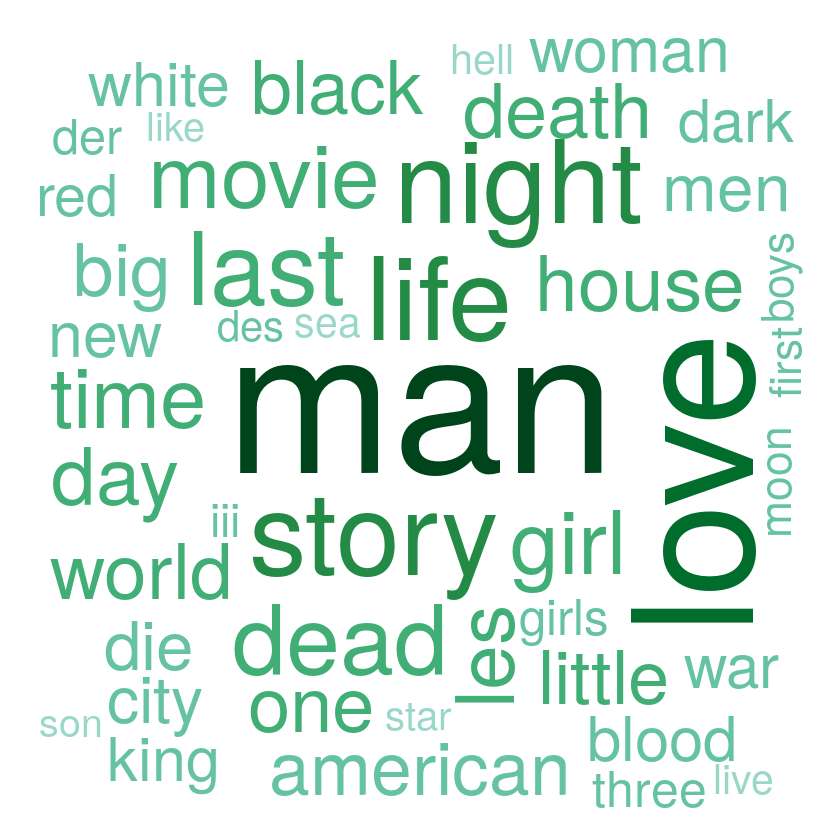

In [9]:
# Set a seed and set the color palette before plotting the wordcloud
set.seed(385)
pal <- brewer.pal(9, "BuGn")

pal <- pal[-1:-3]

movies_word_cloud <- wordcloud(movie_corpus, scale=c(10, .5), max.words = 75, colors = pal, random.order = FALSE)

Man, love, story, night, dead are among the most common words in movie titles.

In [10]:
# split our movie genres by the delimiter | and assign them to a character vector 
genres_vec <- unlist(strsplit(movies$genres, "|", fixed = TRUE))

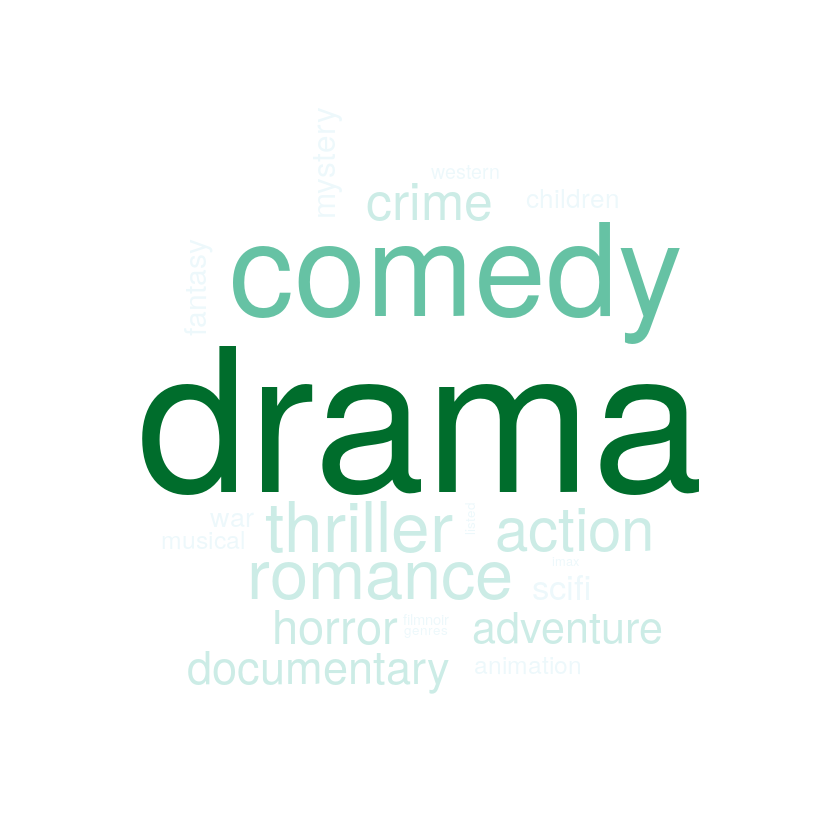

In [11]:
# set a seed
# and plot the word cloud of genres

set.seed(386)

pal <- brewer.pal(6, "BuGn")

genre_word_cloud <- wordcloud(genres_vec, scale = c(10, .5), max.words = 25, random.order = FALSE, random.color = FALSE, colors = pal)


Drama, and comedy are the two most commonly occuring genres according to the word cloud. Though a table might give us better insight into the other most common genres.

In [12]:
# create a table of the genres to display percentage occurence

table_of_genres <- genres_vec %>%
table() %>% 
prop.table()

# return the frequency or percentage of each film genre.
table_of_genres


.
(no genres listed)             Action          Adventure          Animation 
       0.004521560        0.064698746        0.042807779        0.018876594 
          Children             Comedy              Crime        Documentary 
       0.020935191        0.153916847        0.054019777        0.045417785 
             Drama            Fantasy          Film-Noir             Horror 
       0.245267066        0.025953020        0.006065507        0.047991030 
              IMAX            Musical            Mystery            Romance 
       0.003602544        0.019042017        0.027827813        0.075855604 
            Sci-Fi           Thriller                War            Western 
       0.032036908        0.076793001        0.021946109        0.012425100 

The table confirms the findings of the word cloud in that 24 percent of the films are Dramas and 15 percent of the films are Comedy. Thriller, Romance, and Action are the next three most common genres of movies in the dataset.

In [13]:
# return descriptive statistics about the movie ratings
ratings$rating   %>%
as.matrix()     %>%
preprocess_describe(., verbose = TRUE)

[INFO ] dim     var     mean    std     median  min     max     range   skew    kurt    SE      
[INFO ] 0       1.1067  3.5255  1.0520  3.5000  0.5000  5.0000  4.5000  -0.6553 0.1375  0.0002  


list()

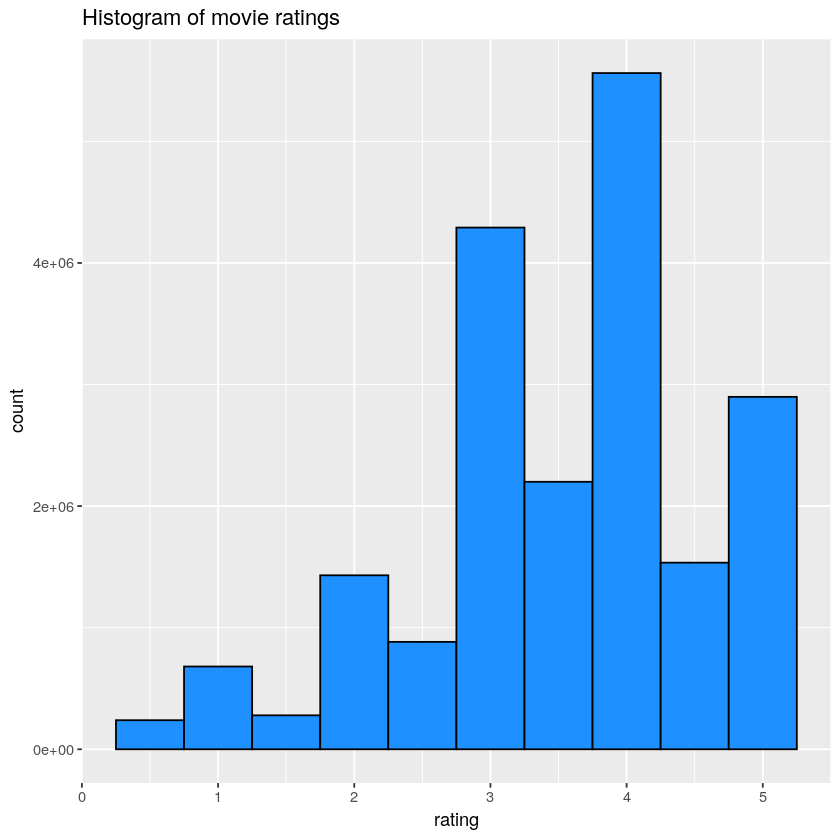

In [14]:
# make a histogram of the ratings 
ratings_hist <- ggplot(ratings, aes(rating)) +
    geom_histogram(binwidth = 0.5, color="Black", fill="dodgerblue") +
    ggtitle(label = "Histogram of movie ratings")

ratings_hist

The mean rating is 3.5 with a rating of 3 or 4 being the other most common ratings.

In [15]:
# hold out 10% of the dataset into a test set
# Set seed for reproducibility 
set.seed(387)
output <- ratings   %>%
       as.matrix(.) %>%
       preprocess_split(., test_ratio = 0.1, verbose = TRUE)

ratings_train <- output$training
ratings_test <- output$test

[INFO ] Training data contains 18000237 points.
[INFO ] Test data contains 2000026 points.


In [16]:
# Train the model. Change the rank to increase/decrease the complexity
# of the model.
model_output <- cf(training = ratings_train,
                  test = ratings_test,
                  rank = 10,
                  verbose = TRUE,
                  max_iterations = 2,
                  algorithm = "RegSVD")

# model 
cf_model <- model_output$output_model


[WARN ] "output" ignored because no recommendations requested!
[INFO ] Performing CF matrix decomposition on dataset...
[WARN ] The batch size for optimizing RegularizedSVD is 1.
[INFO ] Epoch 1; objective 4.99683e+07.
[INFO ] Epoch 2; objective 1.57146e+07.
[INFO ] 514515743 node combinations were scored.
[INFO ] 456437473 base cases were calculated.
[INFO ] RMSE is 0.875984.


In [17]:
# query the 10 top movies for user 1.
output <- cf(input_model = cf_model,
            query = matrix(1),
            recommendations = 10,
            verbose = TRUE)


[INFO ] Generating recommendations for 1 users.
[INFO ] 933 node combinations were scored.
[INFO ] 1308 base cases were calculated.


In [18]:
# print the recommendations for user 1
cat("Recommendations for user 1:\n")
for (i in 1:10) {
  cat(" ", i,  ":", as.character(movies[output$output[i], 3]), "\n")
}

Recommendations for user 1:
  1 : Island, The (a.k.a. Naked Island) (Hadaka no shima) (1960) 
  2 : Welcome Home, Roxy Carmichael (1990) 
  3 : Who the Hell Is Juliette? (¿Quién diablos es Juliette?) (1997) 
  4 : Silence, The (Tystnaden) (1963) 
  5 : Red River (1948) 
  6 : Warriors (Guerreros) (2002) 
  7 : Richard Pryor Live on the Sunset Strip (1982) 
  8 : Hotel Terminus: The Life and Times of Klaus Barbie (Hôtel Terminus) (1988) 
  9 : Good Morning (Ohayô) (1959) 
  10 : Raisin in the Sun, A (2008) 


User 1 hasn't rated any of these films, so lets join the data sets on the movieId as our output object has a list of the movieIds recommended to user 1.

In [19]:
# data.tables setkey() sorts our data.table according to a key we specify
setkey(movies, movieId)
setkey(ratings, movieId)

# inner join the data on movieId
Joined <- movies[ratings, nomatch=0]

In [21]:
# print the mean rating of the recommended movies to user 1
cat("Ratings for user 1:\n")
for (i in 1:10) {
 cat(" ", i, ":", as.character(Joined[.(output$output[i]), round(mean(rating), digits = 1)]), "-", as.character(movies[output$output[i], 3]), "\n")
}

Ratings for user 1:
  1 : 4 - Island, The (a.k.a. Naked Island) (Hadaka no shima) (1960) 
  2 : 4 - Welcome Home, Roxy Carmichael (1990) 
  3 : 4.1 - Who the Hell Is Juliette? (¿Quién diablos es Juliette?) (1997) 
  4 : 4 - Silence, The (Tystnaden) (1963) 
  5 : 3.9 - Red River (1948) 
  6 : 3.9 - Warriors (Guerreros) (2002) 
  7 : 4 - Richard Pryor Live on the Sunset Strip (1982) 
  8 : 4 - Hotel Terminus: The Life and Times of Klaus Barbie (Hôtel Terminus) (1988) 
  9 : 3.8 - Good Morning (Ohayô) (1959) 
  10 : 3.9 - Raisin in the Sun, A (2008) 


All of the movies recommended to user 1 have about an average rating of 4, so it looks like user 1 has great taste in movies.